#  Pratique de pandas: un exemple complet



Les exemples de ce TP sont visualisables sous forme de notebooks:

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&init.personnalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=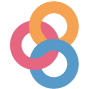)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)

Dans ce tutoriel `pandas`, nous allons utiliser deux sources de données :

* Les émissions de gaz à effet de serre estimées au niveau communal par l'ADEME. Le jeu de données est 
disponible sur [data.gouv](https://www.data.gouv.fr/fr/datasets/inventaire-de-gaz-a-effet-de-serre-territorialise/#_)
et requêtable directement dans python avec
[cet url](https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert).
 `pandas` offre la possibilité d'importer des données directement depuis un url. C'est l'option
prise dans ce tutoriel.
Si vous préfèrez, pour des
raisons d'accès au réseau ou de performance, importer depuis un poste local,
vous pouvez télécharger les données et changer
les commandes d'import avec le chemin adéquat plutôt que l'url. 

* Idéalement, on utiliserait les données
[disponibles sur le site de l'Insee](https://www.insee.fr/fr/statistiques/3560121) mais celles-ci nécessitent un peu de travail
de nettoyage qui n'entre pas dans le cadre de ce TP. 
Pour faciliter l'import de données Insee, il est recommandé d'utiliser le package
[`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data) qui simplifie l'accès aux données
de l'Insee disponibles sur le site web [insee.fr](https://www.insee.fr/fr/accueil)
ou via des API. 

[^1]: Toute contribution sur ce package, disponible sur [Github](https://github.com/InseeFrLab/Py-Insee-Data) est bienvenue !

Nous suivrons les conventions habituelles dans l'import des packages



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pynsee
import pynsee.download

## Exploration de la structure des données

Commencer par importer les données de l'Ademe à l'aide du package `pandas`. Vous pouvez les nommer `df`.


Pour les données de cadrage au niveau communal (source Insee), le package `pynsee` facilite grandement la vie. 
La liste des données disponibles est [ici](https://inseefrlab.github.io/DoReMIFaSol/articles/donnees_dispo.html).
En l'occurrence, on va utiliser les données Filosofi (données de revenus) au niveau communal. 
Le code pour les télécharger est le suivant :


In [ ]:
df_city = pynsee.download.telechargerDonnees("FILOSOFI_COM", date = "dernier")

```
## No destination directory defined. Data have been written there: /tmp/tmpgkmsbk_j
## 
## 
Downloading:   0%|          | 0.00/2.67M [00:00<?, ?iB/s]
Downloading:   1%|          | 16.0k/2.67M [00:00<00:39, 70.6kiB/s]
Downloading:   1%|          | 24.0k/2.67M [00:00<00:54, 50.4kiB/s]
Downloading:   2%|2         | 64.0k/2.67M [00:00<00:24, 110kiB/s] 
Downloading:   3%|2         | 75.0k/2.67M [00:00<00:31, 85.3kiB/s]
Downloading:   3%|3         | 89.0k/2.67M [00:01<00:35, 76.3kiB/s]
Downloading:   4%|3         | 104k/2.67M [00:01<00:37, 72.6kiB/s] 
Downloading:   4%|4         | 120k/2.67M [00:01<00:36, 72.3kiB/s]
Downloading:   5%|4         | 128k/2.67M [00:01<00:44, 60.5kiB/s]
Downloading:   5%|5         | 143k/2.67M [00:02<00:42, 62.3kiB/s]
Downloading:   6%|5         | 159k/2.67M [00:02<00:40, 64.9kiB/s]
Downloading:   6%|6         | 175k/2.67M [00:02<00:39, 66.4kiB/s]
Downloading:   8%|7         | 207k/2.67M [00:02<00:30, 85.1kiB/s]
Downloading:   8%|8         | 223k/2.67M [00:03<00:30, 84.6kiB/s]
Downloading:   9%|9         | 255k/2.67M [00:03<00:22, 113kiB/s] 
Downloading:  10%|9         | 268k/2.67M [00:03<00:22, 112kiB/s]
Downloading:  10%|#         | 280k/2.67M [00:03<00:25, 98.5kiB/s]
Downloading:  11%|#1        | 310k/2.67M [00:03<00:30, 81.7kiB/s]
Downloading:  13%|#3        | 358k/2.67M [00:04<00:20, 118kiB/s] 
Downloading:  14%|#3        | 374k/2.67M [00:04<00:23, 104kiB/s]
Downloading:  14%|#4        | 390k/2.67M [00:04<00:25, 94.4kiB/s]
Downloading:  15%|#4        | 406k/2.67M [00:04<00:29, 79.5kiB/s]
Downloading:  16%|#5        | 426k/2.67M [00:05<00:32, 72.0kiB/s]
Downloading:  16%|#6        | 442k/2.67M [00:05<00:45, 51.2kiB/s]
Downloading:  17%|#6        | 458k/2.67M [00:06<00:59, 39.2kiB/s]
Downloading:  17%|#7        | 474k/2.67M [00:06<00:52, 44.4kiB/s]
Downloading:  18%|#7        | 490k/2.67M [00:07<00:55, 41.1kiB/s]
Downloading:  19%|#8        | 506k/2.67M [00:07<00:48, 46.8kiB/s]
Downloading:  19%|#9        | 522k/2.67M [00:07<00:43, 51.9kiB/s]
Downloading:  20%|#9        | 537k/2.67M [00:08<00:59, 37.6kiB/s]
Downloading:  20%|##        | 555k/2.67M [00:08<00:48, 45.6kiB/s]
Downloading:  21%|##        | 571k/2.67M [00:08<00:43, 51.0kiB/s]
Downloading:  22%|##1       | 587k/2.67M [00:09<00:49, 44.7kiB/s]
Downloading:  22%|##2       | 603k/2.67M [00:09<00:43, 50.5kiB/s]
Downloading:  23%|##2       | 619k/2.67M [00:09<00:39, 55.1kiB/s]
Downloading:  23%|##3       | 635k/2.67M [00:10<00:36, 58.6kiB/s]
Downloading:  24%|##3       | 651k/2.67M [00:10<00:34, 62.3kiB/s]
Downloading:  24%|##4       | 667k/2.67M [00:10<00:32, 64.3kiB/s]
Downloading:  25%|##5       | 686k/2.67M [00:10<00:29, 69.8kiB/s]
Downloading:  26%|##5       | 702k/2.67M [00:11<00:29, 69.5kiB/s]
Downloading:  26%|##6       | 718k/2.67M [00:11<00:29, 70.3kiB/s]
Downloading:  27%|##7       | 750k/2.67M [00:11<00:36, 55.6kiB/s]
Downloading:  29%|##8       | 782k/2.67M [00:12<00:27, 72.7kiB/s]
Downloading:  29%|##9       | 798k/2.67M [00:12<00:33, 59.0kiB/s]
Downloading:  30%|##9       | 814k/2.67M [00:12<00:31, 61.3kiB/s]
Downloading:  31%|###       | 836k/2.67M [00:13<00:27, 69.5kiB/s]
Downloading:  31%|###1      | 852k/2.67M [00:13<00:27, 69.7kiB/s]
Downloading:  32%|###1      | 868k/2.67M [00:13<00:27, 69.9kiB/s]
Downloading:  32%|###2      | 884k/2.67M [00:13<00:27, 69.5kiB/s]
Downloading:  33%|###2      | 900k/2.67M [00:14<00:26, 70.1kiB/s]
Downloading:  34%|###4      | 932k/2.67M [00:14<00:20, 88.1kiB/s]
Downloading:  35%|###4      | 948k/2.67M [00:14<00:21, 85.4kiB/s]
Downloading:  35%|###5      | 968k/2.67M [00:14<00:21, 85.8kiB/s]
Downloading:  36%|###6      | 984k/2.67M [00:14<00:19, 93.4kiB/s]
Downloading:  37%|###6      | 0.98M/2.67M [00:15<00:17, 99.2kiB/s]
Downloading:  37%|###7      | 0.99M/2.67M [00:15<00:18, 93.5kiB/s]
Downloading:  38%|###8      | 1.02M/2.67M [00:15<00:15, 110kiB/s] 
Downloading:  39%|###8      | 1.04M/2.67M [00:15<00:14, 114kiB/s]
Downloading:  40%|###9      | 1.05M/2.67M [00:15<00:13, 122kiB/s]
Downloading:  40%|####      | 1.07M/2.67M [00:15<00:13, 121kiB/s]
Downloading:  41%|####      | 1.08M/2.67M [00:15<00:13, 126kiB/s]
Downloading:  41%|####1     | 1.10M/2.67M [00:16<00:13, 125kiB/s]
Downloading:  42%|####1     | 1.12M/2.67M [00:16<00:12, 131kiB/s]
Downloading:  42%|####2     | 1.13M/2.67M [00:16<00:11, 134kiB/s]
Downloading:  43%|####3     | 1.15M/2.67M [00:16<00:12, 123kiB/s]
Downloading:  44%|####4     | 1.18M/2.67M [00:16<00:10, 142kiB/s]
Downloading:  45%|####4     | 1.19M/2.67M [00:16<00:11, 137kiB/s]
Downloading:  45%|####5     | 1.21M/2.67M [00:16<00:11, 137kiB/s]
Downloading:  46%|####5     | 1.22M/2.67M [00:16<00:11, 137kiB/s]
Downloading:  46%|####6     | 1.24M/2.67M [00:17<00:10, 139kiB/s]
Downloading:  48%|####7     | 1.27M/2.67M [00:17<00:10, 139kiB/s]
Downloading:  48%|####8     | 1.28M/2.67M [00:17<00:12, 113kiB/s]
Downloading:  49%|####9     | 1.32M/2.67M [00:17<00:11, 127kiB/s]
Downloading:  50%|#####     | 1.33M/2.67M [00:17<00:10, 131kiB/s]
Downloading:  51%|#####     | 1.35M/2.67M [00:18<00:10, 132kiB/s]
Downloading:  51%|#####1    | 1.36M/2.67M [00:18<00:12, 107kiB/s]
Downloading:  52%|#####1    | 1.38M/2.67M [00:18<00:11, 115kiB/s]
Downloading:  52%|#####2    | 1.40M/2.67M [00:18<00:12, 107kiB/s]
Downloading:  53%|#####2    | 1.41M/2.67M [00:18<00:12, 103kiB/s]
Downloading:  53%|#####3    | 1.43M/2.67M [00:18<00:11, 111kiB/s]
Downloading:  54%|#####4    | 1.44M/2.67M [00:18<00:10, 120kiB/s]
Downloading:  55%|#####4    | 1.46M/2.67M [00:19<00:10, 119kiB/s]
Downloading:  55%|#####5    | 1.47M/2.67M [00:19<00:10, 117kiB/s]
Downloading:  56%|#####6    | 1.50M/2.67M [00:19<00:09, 126kiB/s]
Downloading:  58%|#####7    | 1.54M/2.67M [00:19<00:08, 132kiB/s]
Downloading:  59%|#####8    | 1.57M/2.67M [00:19<00:08, 134kiB/s]
Downloading:  59%|#####9    | 1.58M/2.67M [00:20<00:12, 91.6kiB/s]
Downloading:  61%|######    | 1.62M/2.67M [00:20<00:09, 112kiB/s] 
Downloading:  61%|######1   | 1.64M/2.67M [00:20<00:10, 99.6kiB/s]
Downloading:  62%|######1   | 1.65M/2.67M [00:21<00:11, 92.8kiB/s]
Downloading:  63%|######3   | 1.68M/2.67M [00:21<00:09, 104kiB/s] 
Downloading:  64%|######3   | 1.70M/2.67M [00:21<00:13, 73.6kiB/s]
Downloading:  64%|######4   | 1.71M/2.67M [00:22<00:17, 58.3kiB/s]
Downloading:  65%|######5   | 1.74M/2.67M [00:22<00:17, 54.6kiB/s]
Downloading:  66%|######5   | 1.75M/2.67M [00:23<00:18, 51.6kiB/s]
Downloading:  66%|######6   | 1.77M/2.67M [00:23<00:18, 51.6kiB/s]
Downloading:  67%|######6   | 1.78M/2.67M [00:23<00:17, 51.9kiB/s]
Downloading:  67%|######7   | 1.80M/2.67M [00:24<00:17, 52.3kiB/s]
Downloading:  68%|######8   | 1.81M/2.67M [00:24<00:15, 56.0kiB/s]
Downloading:  69%|######8   | 1.83M/2.67M [00:24<00:14, 59.8kiB/s]
Downloading:  69%|######9   | 1.84M/2.67M [00:24<00:12, 68.5kiB/s]
Downloading:  70%|######9   | 1.86M/2.67M [00:24<00:12, 67.9kiB/s]
Downloading:  70%|#######   | 1.88M/2.67M [00:25<00:11, 69.8kiB/s]
Downloading:  71%|#######1  | 1.89M/2.67M [00:25<00:10, 79.2kiB/s]
Downloading:  72%|#######1  | 1.91M/2.67M [00:25<00:09, 85.8kiB/s]
Downloading:  72%|#######2  | 1.92M/2.67M [00:25<00:08, 90.5kiB/s]
Downloading:  73%|#######2  | 1.94M/2.67M [00:25<00:08, 92.9kiB/s]
Downloading:  73%|#######3  | 1.96M/2.67M [00:25<00:07, 98.3kiB/s]
Downloading:  74%|#######3  | 1.97M/2.67M [00:26<00:07, 102kiB/s] 
Downloading:  75%|#######4  | 1.99M/2.67M [00:26<00:06, 103kiB/s]
Downloading:  76%|#######5  | 2.02M/2.67M [00:26<00:05, 116kiB/s]
Downloading:  76%|#######6  | 2.03M/2.67M [00:26<00:05, 113kiB/s]
Downloading:  77%|#######6  | 2.05M/2.67M [00:26<00:07, 87.1kiB/s]
Downloading:  78%|#######8  | 2.08M/2.67M [00:27<00:05, 104kiB/s] 
Downloading:  79%|#######8  | 2.09M/2.67M [00:27<00:08, 71.6kiB/s]
Downloading:  79%|#######9  | 2.11M/2.67M [00:27<00:08, 67.9kiB/s]
Downloading:  80%|#######9  | 2.13M/2.67M [00:28<00:10, 56.5kiB/s]
Downloading:  80%|########  | 2.14M/2.67M [00:28<00:09, 56.3kiB/s]
Downloading:  81%|########  | 2.15M/2.67M [00:28<00:11, 48.1kiB/s]
Downloading:  81%|########1 | 2.17M/2.67M [00:29<00:09, 52.8kiB/s]
Downloading:  82%|########2 | 2.19M/2.67M [00:29<00:08, 57.3kiB/s]
Downloading:  83%|########2 | 2.20M/2.67M [00:29<00:08, 60.5kiB/s]
Downloading:  83%|########3 | 2.22M/2.67M [00:29<00:07, 62.8kiB/s]
Downloading:  84%|########3 | 2.23M/2.67M [00:30<00:07, 64.6kiB/s]
Downloading:  84%|########4 | 2.25M/2.67M [00:30<00:06, 65.7kiB/s]
Downloading:  85%|########5 | 2.28M/2.67M [00:30<00:05, 80.4kiB/s]
Downloading:  86%|########6 | 2.29M/2.67M [00:31<00:07, 51.5kiB/s]
Downloading:  87%|########6 | 2.31M/2.67M [00:31<00:08, 46.3kiB/s]
Downloading:  87%|########7 | 2.32M/2.67M [00:32<00:07, 47.4kiB/s]
Downloading:  88%|########7 | 2.34M/2.67M [00:32<00:07, 45.9kiB/s]
Downloading:  88%|########8 | 2.36M/2.67M [00:32<00:06, 50.9kiB/s]
Downloading:  89%|########8 | 2.37M/2.67M [00:32<00:05, 55.9kiB/s]
Downloading:  89%|########9 | 2.38M/2.67M [00:33<00:05, 56.2kiB/s]
Downloading:  90%|######### | 2.40M/2.67M [00:33<00:04, 59.9kiB/s]
Downloading:  91%|######### | 2.42M/2.67M [00:33<00:04, 62.5kiB/s]
Downloading:  91%|#########1| 2.43M/2.67M [00:33<00:03, 64.8kiB/s]
Downloading:  92%|#########2| 2.46M/2.67M [00:34<00:02, 85.5kiB/s]
Downloading:  93%|#########2| 2.48M/2.67M [00:34<00:02, 82.8kiB/s]
Downloading:  94%|#########3| 2.49M/2.67M [00:34<00:02, 82.2kiB/s]
Downloading:  94%|#########4| 2.51M/2.67M [00:34<00:01, 87.7kiB/s]
Downloading:  95%|#########4| 2.52M/2.67M [00:35<00:02, 67.5kiB/s]
Downloading:  96%|#########5| 2.55M/2.67M [00:35<00:01, 88.0kiB/s]
Downloading:  96%|#########6| 2.57M/2.67M [00:35<00:01, 83.2kiB/s]
Downloading:  97%|#########6| 2.58M/2.67M [00:35<00:01, 79.3kiB/s]
Downloading:  98%|#########7| 2.60M/2.67M [00:36<00:01, 58.5kiB/s]
Downloading:  98%|#########8| 2.62M/2.67M [00:36<00:00, 62.1kiB/s]
Downloading:  99%|#########8| 2.63M/2.67M [00:36<00:00, 65.0kiB/s]
Downloading:  99%|#########9| 2.64M/2.67M [00:36<00:00, 58.5kiB/s]
Downloading:  99%|#########9| 2.65M/2.67M [00:37<00:00, 50.4kiB/s]
Downloading: 100%|##########| 2.67M/2.67M [00:37<00:00, 75.3kiB/s]
## 
Extracting:   0%|          | 0.00/10.6M [00:00<?, ?B/s]
Extracting: 100%|##########| 10.6M/10.6M [00:00<00:00, 165MB/s]
```

**Exercice 1: Afficher des données**

L'objectif de cet exercice est de vous amener à afficher des informations sur les données dans un bloc de code (notebook) ou dans la console
    
Commencer sur `df`: 

    * Utiliser les méthodes adéquates pour les 10 premières valeurs, les 15 dernières et un échantillon aléatoire de 10 valeurs
    * Tirer 5 pourcent de l'échantillon sans remise
    * Ne conserver que les 10 premières lignes et tirer aléatoirement dans celles-ci pour obtenir un DataFrame de 100 données.
    * Faire 100 tirages à partir des 6 premières lignes avec une probabilité de 1/2 pour la première observation et une probabilité uniforme pour les autres
    
Faire la même chose sur `df_city`




Cette première approche exploratoire donne une idée assez précise de la manière dont les données sont organisées. On remarque ainsi une différence entre `df` et `df_city` quant aux valeurs manquantes: la première base est relativement complète, la seconde comporte beaucoup de valeurs manquantes. Autrement dit, si on désire exploiter `df_city`, il faut faire attention à la variable choisie.


**Exercice 2: structure des données**

La première chose à vérifier est le format des données, afin d'identifier des types de variables qui ne conviennent pas. Ici, comme c'est `pandas` qui a géré automatiquement les types de variables, il y a peu de chances que les types ne soient pas adéquats mais une vérification ne fait pas de mal.

* Vérifier les types des variables. S'assurer que les types des variables communes aux deux bases sont cohérents.




Ensuite, on vérifie les dimensions des `DataFrames` et la structure de certaines variables clés. En l'occurrence, les variables fondamentales pour lier nos données sont les variables communales. Ici, on a deux variables géographiques: un code commune et un nom de commune. 

* Vérifier les dimensions des DataFrames


* Vérifier le nombre de valeurs uniques des variables géographiques dans chaque base. Les résultats apparaissent-ils cohérents ?


* Identifier les libellés pour lesquels on a plusieurs codes communes dans `df_city` et les stocker dans un vecteur `x` (conseil: faire attention à l'index de `x`)



On se focalise temporairement sur les observations où le libellé comporte plus de deux codes communes différents

* Regarder dans `df_city` ces observations

* Pour mieux y voir, réordonner la base obtenue par order alphabétique


* Déterminer la taille moyenne (variable nombre de personnes: `NBPERSMENFISC16`) et quelques statistiques descriptives de ces données. Comparer aux mêmes statistiques sur les données où libellés et codes communes coïncident


* Vérifier sur les grandes villes (plus de 100 000 personnes), la proportion de villes où libellés et codes communes ne coïncident pas. Identifier ces observations.


* Vérifier dans `df_city` les villes dont le libellé est égal à Montreuil. Vérifier également celles qui contiennent le terme 'Saint-Denis'






Ce petit exercice permet de se rassurer car les libellés dupliqués sont en fait des noms de commune identiques mais qui ne sont pas dans le même département. Il ne s'agit donc pas d'observations dupliquées. On se fiera ainsi aux codes communes, qui eux sont uniques.

## Les indices

Les indices sont des éléments spéciaux d'un DataFrame puisqu'ils permettent d'identifier certaines observations. Il est tout à fait possible d'utiliser plusieurs indices, par exemple si on a des niveaux imbriqués.


**Exercice 3: Les indices**

A partir de l'exercice précédent, on peut se fier aux codes communes.

* Fixer comme indice la variable de code commune dans les deux bases. Regarder le changement que cela induit sur le *display* du dataframe


* Les deux premiers chiffres des codes communes sont le numéro de département. Créer une variable de département `dep` dans `df` et dans `df_city`


* Calculer les émissions totales par secteur pour chaque département. Mettre en log ces résultats dans un objet `df_log`. Garder 5 départements et produire un barplot


* Repartir de `df`. Calculer les émissions totales par département et sortir la liste des 10 principaux émetteurs de CO2 et des 5 départements les moins émetteurs. Sans faire de *merge*, regarder les caractéristiques de ces départements (population et niveau de vie)








**Exercice 4: performance des indices**

Un des intérêts des indices est qu'ils permettent des agrégations efficaces. 

* Repartir de `df` et créer une copie `df_copy = df.copy()` et `df_copy2 = df.copy()` afin de ne pas écraser le DataFrame `df`


* Utiliser la variable `dep` comme indice pour `df_copy` et retirer tout index pour `df_copy2`


* Importer le module `timeit` et comparer le temps d'exécution de la somme par secteur, pour chaque département, des émissions de CO2








# Restructurer les données

On présente généralement deux types de données: 
    
    * format __wide__: les données comportent des observations répétées, pour un même individu (ou groupe), dans des colonnes différentes 
    * format __long__: les données comportent des observations répétées, pour un même individu, dans des lignes différentes avec une colonne permettant de distinguer les niveaux d'observations

Un exemple de la distinction entre les deux peut être pris à l'ouvrage de référence d'Hadley Wickham, *R for Data Science*:

![](https://d33wubrfki0l68.cloudfront.net/3aea19108d39606bbe49981acda07696c0c7fcd8/2de65/images/tidy-9.png)


L'aide mémoire suivante aidera à se rappeler les fonctions à appliquer si besoin:

![](../02a_pandas_tutorial/reshape.png)

Le fait de passer d'un format *wide* au format *long* (ou vice-versa) peut être extrêmement pratique car certaines fonctions sont plus adéquates sur une forme de données ou sur l'autre. En règle générale, avec `python` comme avec `R`, les formats *long* sont souvent préférables.

**Exercice 5: Restructurer les données: wide to long**

* Créer une copie des données de l'ADEME en faisant `df_wide = df.copy()`


* Restructurer les données au format *long* pour avoir des données d'émissions par secteur en gardant comme niveau d'analyse la commune (attention aux autres variables identifiantes).


* Faire la somme par secteur et représenter graphiquement


* Garder, pour chaque département, le secteur le plus polluant








**Exercice 6: long to wide**

Cette transformation est moins fréquente car appliquer des fonctions par groupe, comme nous le verrons par la suite, est très simple. 

* Repartir de `df_wide = df.copy()


* Reconstruire le DataFrame, au format long, des données d'émissions par secteur en gardant comme niveau d'analyse la commune puis faire la somme par département et secteur


* Passer au format *wide* pour avoir une ligne par secteur et une colonne par département



* Calculer, pour chaque secteur, la place du département dans la hiérarchie des émissions nationales




* A partir de là, en déduire le rang médian de chaque département dans la hiérarchie des émissions et regarder les 10 plus mauvais élèves, selon ce critère.






# Combiner les données

Une information que l'on cherche à obtenir s'obtient de moins en moins à partir d'une unique base de données. Il devient commun de devoir combiner des données issues de sources différentes. Nous allons ici nous focaliser sur le cas le plus favorable qui est la situation où une information permet d'apparier de manière exacte deux bases de données (autrement nous serions dans une situation, beaucoup plus complexe, d'appariement flou). La situation typique est l'appariement entre deux sources de données selon un identifiant individuel ou un identifiant de code commune, ce qui est notre cas.

Il est recommandé de lire [ce guide assez complet sur la question des jointures avec R](https://linogaliana.gitlab.io/documentationR/joindre-des-tables-de-donn%C3%A9es.html) qui donne des recommandations également utiles en `python`.

On utilise de manière indifférente les termes *merge* ou *join*. Le deuxième terme provient de la syntaxe SQL. En `pandas`, dans la plupart des cas, on peut utiliser indifféremment `df.join` et `df.merge`

![](../02a_pandas_tutorial/pandas_join.png)


**Exercice 7: Calculer l'empreinte carbone par habitant**

* Créer une variable `emissions` qui correspond aux émissions totales d'une commune


* Faire une jointure à gauche entre les données d'émissions et les données de cadrage. Comparer les émissions moyennes des villes sans *match* (celles dont des variables bien choisies de la table de droite sont NaN) avec celles où on a bien une valeur correspondante dans la base Insee



* Faire un *inner join* puis calculer l'empreinte carbone (l'émission rapportée au nombre de ménages fiscaux) dans chaque commune. Sortir un histogramme en niveau puis en log et quelques statistiques descriptives sur le sujet. 



* Regarder la corrélation entre les variables de cadrage et l'empreinte carbone. Certaines variables semblent-elles pouvoir potentiellement influer sur l'empreinte carbone ?







<!-----

# Appliquer des fonctions

On peut utiliser `apply` pour passer des fonctions à appliquer sur plusieurs colonnes ou sur plusieurs valeurs

----->

# Exercices bonus

Les plus rapides d'entre vous sont invités à aller un peu plus loin en s'entraînant avec des exercices bonus qui proviennent du  [site de Xavier Dupré](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3). 3 notebooks en lien avec `numpy` et `pandas` vous y sont proposés : 

1. Calcul Matriciel, Optimisation : [énoncé](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td2a_cenonce_session_2A.html) / [corrigé](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td2a_correction_session_2A.html)
2. DataFrame et Graphes : [énoncé](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td2a_cenonce_session_1.html) / [corrigé](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td2a_correction_session_1.html)
3. Pandas et itérateurs : [énoncé](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/pandas_iterator.html) / [corrigé](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/pandas_iterator_correction.html)
